# Case Study: Sentiment Analysis

- An important part of our information-gathering behavior has always been to find out what other people think.
- With the growing text processing and NLP techniques improve ability to identify sentiment or opinion of individual from review, personal blog and social media.
- This helps to understand Product or service quality, competition senario and customers expectations.

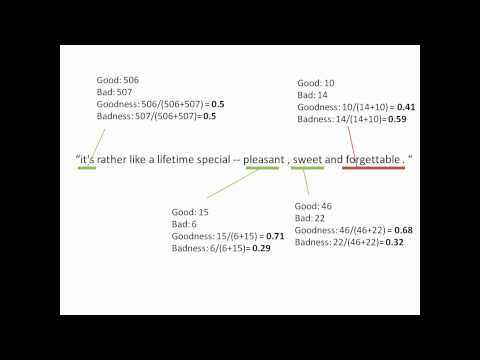

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("ytUHvMNnzZk")

- Dataset for the case study:
https://www.kaggle.com/nehasontakke/amazon-unlocked-mobilecsv

In [2]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
print(df.shape)
# Sample the data to speed up computation
# Comment out this line to match with lecture

(413840, 6)


<b> Include only 10% random data from original dataset

In [3]:
df = df.sample(frac=0.1, random_state=10)
print(df.shape)
df.head()

(41384, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [4]:
# Drop review with missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

<b>
- Encode 4s and 5s as 1 (rated positively)
- Encode 1s and 2s as 0 (rated poorly)

In [5]:
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
print(df.shape)
df.head(10)

(30737, 7)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [6]:
df['Positively Rated'].value_counts(normalize=True) * 100

1    74.717767
0    25.282233
Name: Positively Rated, dtype: float64

- 75% are positive and 25% are negaive reviews

- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Positively Rated'], test_size=0.33,random_state=0,stratify=df['Positively Rated'])
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Positively Rated'], test_size=0.33,random_state=0)

In [8]:
print('\nX_train shape: ', X_train.shape)
print('\nX_test shape: ', X_test.shape)


X_train shape:  (20593,)

X_test shape:  (10144,)


<b> Feature extraction using CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
len(vect.get_feature_names())
print('Top extrcated Features: {}'.format(vect.get_feature_names()[::2000]))
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

Top extrcated Features: ['00', 'attribute', 'confianza', 'ensure', 'hating', 'lycatel', 'pens', 'retains', 'supl', 'wavers']


<b> Logistic regression model for classification
- http://www.saedsayad.com/logistic_regression.htm
- https://www.youtube.com/watch?v=7qJ7GksOXoA

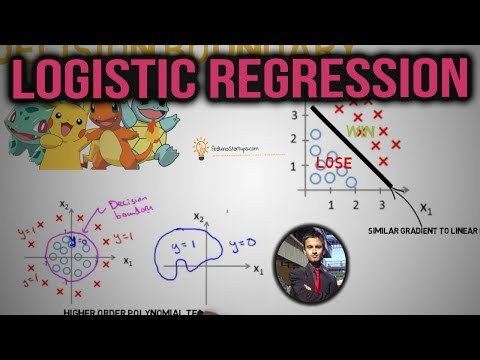

In [10]:
YouTubeVideo("7qJ7GksOXoA")

In [11]:
from sklearn.linear_model import LogisticRegression
# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/home/laxmi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [12]:
from sklearn.metrics import f1_score #Meassures to check model performance

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))
print('F1 score: ', f1_score(y_test, predictions))

F1 score:  0.9533355027660266


In [13]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest

print('Smallest Coefs helps to identify negative reviews:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs to identify positive reviews: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs helps to identify negative reviews:
['terrible' 'worst' 'slow' 'junk' 'poor' 'disappointed' 'horrible'
 'broken' 'sucks' 'broke']

Largest Coefs to identify positive reviews: 
['excelent' 'excelente' 'excellent' 'perfectly' 'love' 'great' 'perfect'
 'exactly' 'best' 'awesome']


<b> Feature extraction using Tfidf Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())
X_train_vectorized = vect.transform(X_train)

In [15]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('F1 score: ', f1_score(y_test, predictions))

F1 score:  0.9543245869776482


In [16]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs helps to identify negative reviews:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs to identify positive reviews: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs helps to identify negative reviews:
['not' 'slow' 'disappointed' 'worst' 'return' 'never' 'terrible' 'doesn'
 'horrible' 'poor']

Largest Coefs to identify positive reviews: 
['great' 'love' 'excellent' 'good' 'best' 'perfect' 'price' 'awesome'
 'far' 'perfectly']


In [17]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


<b> Feature extraction using CountVectorizer by including n-grams

In [18]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

26542

In [19]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('F1 score: ', f1_score(y_test, predictions))

F1 score:  0.959211642628728


In [20]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs helps to identify negative reviews:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs to identify positive reviews: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs helps to identify negative reviews:
['no good' 'junk' 'worst' 'poor' 'broken' 'terrible' 'not good' 'slow'
 'horrible' 'defective']

Largest Coefs to identify positive reviews: 
['excellent' 'excelente' 'great' 'excelent' 'perfect' 'love' 'awesome'
 'no problems' 'best' 'good']


#### Make inference using build model
<b> Identify sentiment for following reviews using model:
    - 'not an issue, phone is working'
    - 'an issue, phone is not working'

In [21]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


### Extract sentiment from text using pre trained model

TextBlob (top of on NLTK) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

- https://textblob.readthedocs.io/en/dev/quickstart.html

In [22]:
from textblob import TextBlob
from nltk.corpus import stopwords #To get stopwords from NLTK corpus

English_stopwords=stopwords.words('english')
print(len(English_stopwords),English_stopwords[0:10])

179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


<b> Words like 'no' and 'not' help us to understand sentiment of sentence, For this usecase we will not consider as stopwords

In [23]:
English_stopwords.remove('no')
English_stopwords.remove('not')
print(len(English_stopwords),English_stopwords[0:10])

177 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [24]:
tb=TextBlob('world is beautiful place')
tb.sentiment

Sentiment(polarity=0.85, subjectivity=1.0)

In [25]:
tb=TextBlob('Global warming is worst thing for world')
tb.sentiment[0]

-0.5

<b> Sentiment claculation using  text blob

In [26]:
def sentiment_using_text_blob(msg):
    #msg=msg.decode('utf-8')    #for linux , uncomment the line
    msg=' '.join([m_ for m_ in msg.split() if m_ not in English_stopwords])
    tb=TextBlob(msg)
    if tb.sentiment[0]>0:
        return 1
    else:
        return 0
predictions=np.array([sentiment_using_text_blob(x_) for x_ in X_test])
print('F1 score: ', f1_score(y_test, predictions))

F1 score:  0.8512882125216927


In [27]:
zip([(x_) for x_ in X_test[0:5]],predictions[0:5])